# Outlier

In statistics, an outlier is an observation point that is distant from other observations in a dataset. Outliers may be due to variability in the data or due to experimental errors. Outliers can significantly affect the results of statistical analyses, such as the mean and standard deviation, which are sensitive to extreme values.

Identifying outliers is important because they can:

> Distort the overall pattern in the data.

> Skew statistical analyses and machine learning models.

> Indicate errors in data collection or measurement.

> Represent rare but valid observations.

There are various methods for detecting outliers, including graphical methods like box plots and scatter plots, as well as statistical methods like z-score analysis, Tukey's method, and Grubbs' test. Once identified, outliers can be removed, transformed, or analyzed separately depending on the context of the analysis.

# Handling outliers


Handling outliers in a dataset involves deciding how to deal with these extreme values to ensure they do not unduly influence statistical analyses or machine learning models. 

There are several methods to identify outliers in a dataset. Here are some common techniques:



## Visual Inspection: 

Plotting the data using scatter plots, box plots, histograms, or QQ plots can provide a visual indication of outliers. Observing points that are significantly distant from the main cluster of data points can often identify outliers.

### Scatter plot

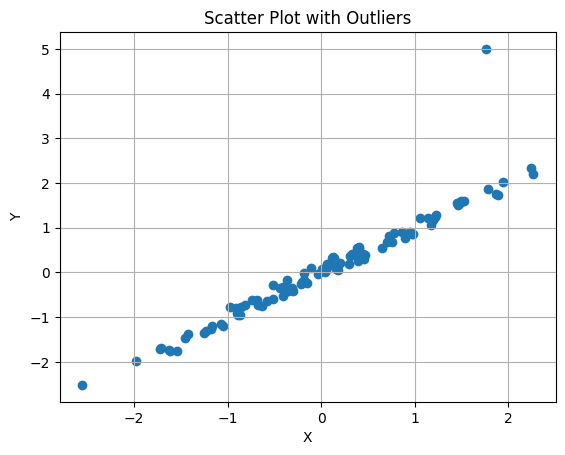

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with outliers
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = x + np.random.normal(0, 0.1, 100)  # Linear relationship with noise
y[0] = 5  # Introducing an outlier

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Outliers')
plt.grid(True)
plt.show()


### Box Plot: 

Box plots visually display the distribution of data and highlight outliers as individual points beyond the whiskers of the plot.

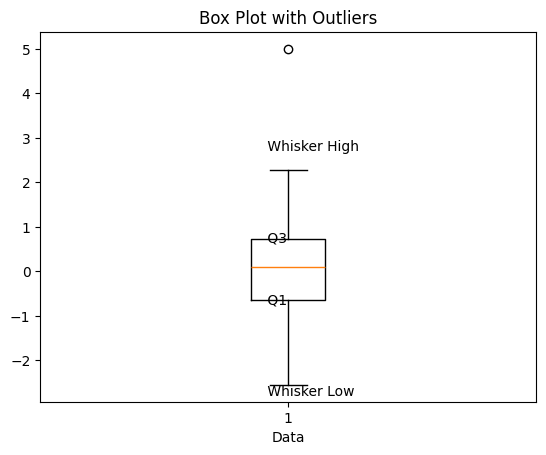

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with outliers
np.random.seed(0)
data = np.random.normal(0, 1, 100)
data[0] = 5  # Introducing an outlier

# Calculate quartiles and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
whisker_low = Q1 - 1.5 * IQR
whisker_high = Q3 + 1.5 * IQR

# Create a box plot
plt.boxplot(data)

# Annotate the plot with quartiles and whiskers
plt.text(0.95, Q1, ' Q1', horizontalalignment='left', verticalalignment='center')
plt.text(0.95, Q3, ' Q3', horizontalalignment='left', verticalalignment='center')
plt.text(0.95, whisker_low, ' Whisker Low', horizontalalignment='left', verticalalignment='center')
plt.text(0.95, whisker_high, ' Whisker High', horizontalalignment='left', verticalalignment='center')

plt.xlabel('Data')
plt.title('Box Plot with Outliers')
plt.show()


### Histogram

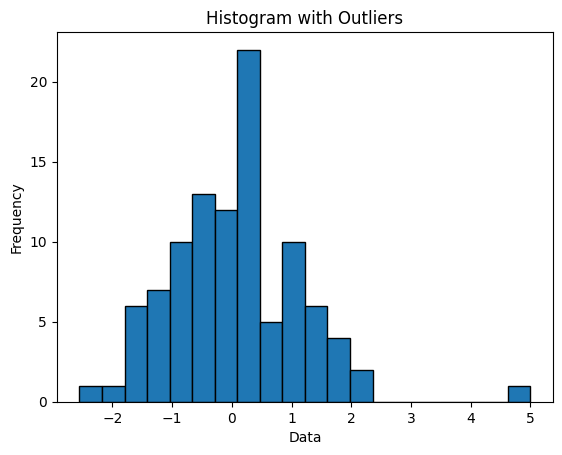

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with outliers
np.random.seed(0)
data = np.random.normal(0, 1, 100)
data[0] = 5  # Introducing an outlier

# Create a histogram
plt.hist(data, bins=20, edgecolor='black')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram with Outliers')
plt.show()


The histogram displays the frequency of data points within each bin.
Outliers may be identified as bars that are significantly taller or separated from the rest of the bars, indicating data points that are uncommon in the dataset.

## Standard Deviation:

Using the standard deviation, you can identify data points that lie a certain number of standard deviations away from the mean. Typically, points that lie more than 2 or 3 standard deviations away from the mean are considered outliers.

## Interquartile Range (IQR):

 Calculating the IQR, which is the difference between the third quartile (Q3) and the first quartile (Q1), can help identify outliers. Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.

To identify outliers using the Interquartile Range (IQR) method, you follow these steps:

1. Calculate the Quartiles: Calculate the first quartile (Q1) and the third quartile (Q3) of the dataset.

2. Calculate the Interquartile Range (IQR): Subtract Q1 from Q3 to find the IQR.

3. Identify Outliers: Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.


In [5]:
import numpy as np

# Generate example data with outliers
np.random.seed(0)
data = np.random.normal(0, 1, 100)
data[0] = 5  # Introducing an outlier

# Calculate quartiles and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:", outliers)


Lower Bound: -2.715257734891628
Upper Bound: 2.8084784056068184
Outliers: [5.0]


## Z-Score:

 Computing the z-score for each data point indicates how many standard deviations it is away from the mean. Data points with z-scores greater than a certain threshold (e.g., 2 or 3) can be considered outliers.

1. Calculate the Z-score for each data point: Subtract the mean of the dataset from each data point and then divide by the standard deviation of the dataset. 

2. Identify outliers: Data points with a Z-score greater than a certain threshold (typically 2 or 3) are considered outliers.

note: Adjust the threshold according to your specific requirements or the characteristics of your dataset. A Z-score threshold of 2 or 3 is commonly used to identify outliers.

In [6]:
import numpy as np

# Generate example data with outliers
np.random.seed(0)
data = np.random.normal(0, 1, 100)
data[0] = 5  # Introducing an outlier

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate Z-scores
z_scores = [(x - mean) / std_dev for x in data]

# Set Z-score threshold for outliers
threshold = 2

# Identify outliers
outliers = [data[i] for i in range(len(data)) if abs(z_scores[i]) > threshold]

print("Outliers:", outliers)


Outliers: [5.0, -2.5529898158340787]
